**Predict House Prices (California Housing Dataset)**

Goal: Predict median home prices in california using linear regression

In [29]:
#Install Required Libraries
!pip install pandas scikit-learn matplotlib seaborn

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target


# Display the first few rows
print(df.head())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


**Visualize the Data**

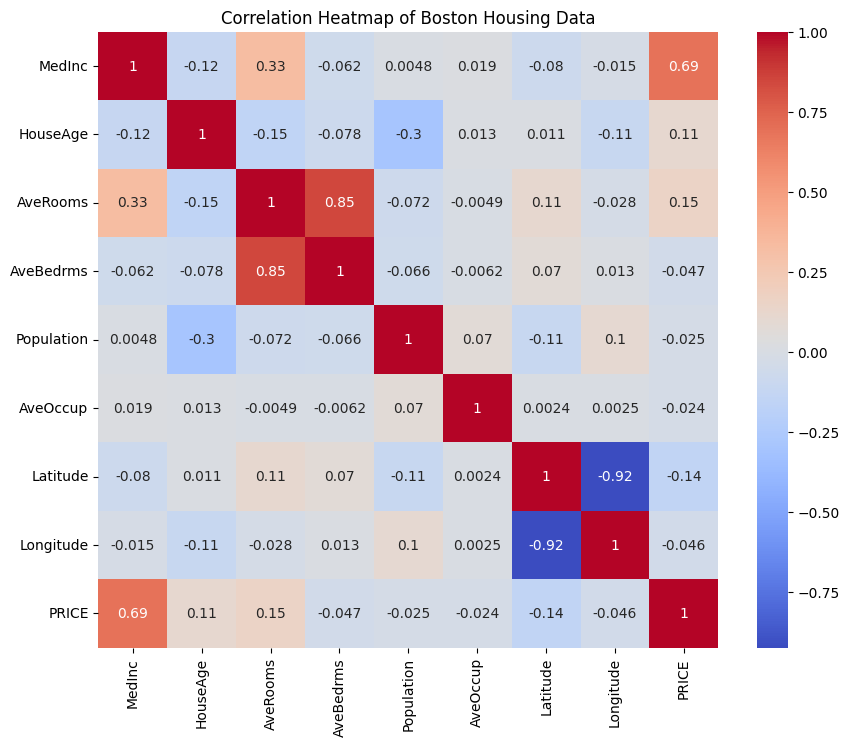

In [37]:
#View correlations between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Boston Housing Data")
plt.show()

**Prepare Data for Regression**

In [38]:
#We’ll use AveRooms (average number of rooms per dwelling) to predict PRICE for simplicity.

# Select feature and target
X = df[['AveRooms']]  # Feature: average number of rooms per household
y = df['PRICE']       # Target: median home value

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80% train, 20% test
)


**Train the Linear Regression Model**

In [39]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Print the learned parameters
print("Model Coefficient (slope):", model.coef_)
print("Model Intercept (bias):", model.intercept_)

Model Coefficient (slope): [0.07675559]
Model Intercept (bias): 1.6547622685968417


**Evaluate the Model**

In [40]:
# Predict on the test data
y_pred = model.predict(X_test)
# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 1.2923314440807299
R² Score: 0.013795337532284901


**Visualize Predictions**

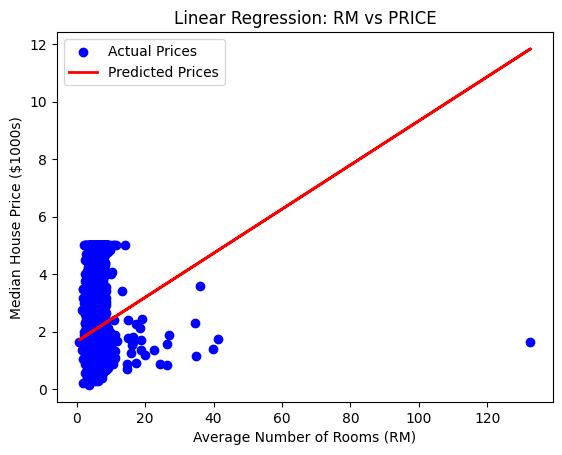

In [41]:
# Plot the regression line and test data
plt.scatter(X_test, y_test, color='blue', label='Actual Prices') # Actual pri
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Price ($1000s)')
plt.title('Linear Regression: RM vs PRICE')
plt.legend()
plt.show()

**Project Summary**
1.   Objective: Predict house prices using a simple linear model
2.   Data: california Housing dataset (with caution, deprecated)
3.  Technique: Linear Regression using scikit-learn
